In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean, levene, ttest_ind


df_kepler=pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr&format=csv")


Limpieza y Filtrado

In [3]:
df_kepler_clean= df_kepler.dropna().reset_index(drop=True)

def filter(df,col,iqr_score):
  iqr_col=df[col].quantile(0.75)-df[col].quantile(0.25)
  filter_lower=df[col]>df[col].quantile(0.25)-(iqr_col*iqr_score)
  filter_upper=df[col]<df[col].quantile(0.75)+(iqr_col*iqr_score)
  return df[filter_lower & filter_upper]

df_filtered=filter(df_kepler_clean,'koi_prad',2)



In [4]:
objects_count=df_filtered["koi_disposition"].value_counts().reset_index()
print(objects_count)

  koi_disposition  count
0  FALSE POSITIVE   3391
1       CONFIRMED   2740
2       CANDIDATE   1836


[Text(0.5, 0, 'total de objetos'), Text(0, 0.5, 'variable categórica')]

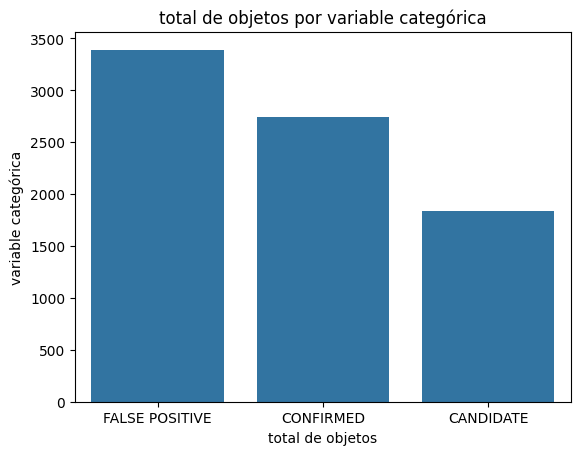

In [5]:
ax=sns.barplot(data=objects_count, x="koi_disposition", y="count")
ax.set_title("total de objetos por variable categórica")
ax.set(xlabel="total de objetos", ylabel="variable categórica")


[Text(0, 0.5, 'radio(Radios terrestres)'), Text(0.5, 0, 'variable categórica')]

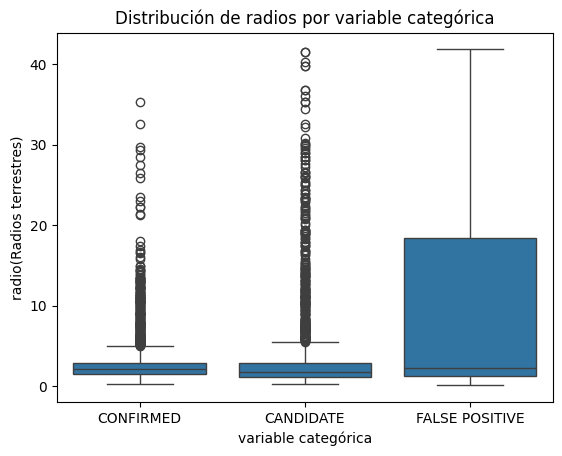

In [6]:

ax1=sns.boxplot(data=df_filtered, x="koi_disposition", y="koi_prad")
ax1.set_title("Distribución de radios por variable categórica")
ax1.set(ylabel="radio(Radios terrestres)", xlabel="variable categórica")

[Text(0, 0.5, 'radio(Radios terrestres)'), Text(0.5, 0, 'variable categórica')]

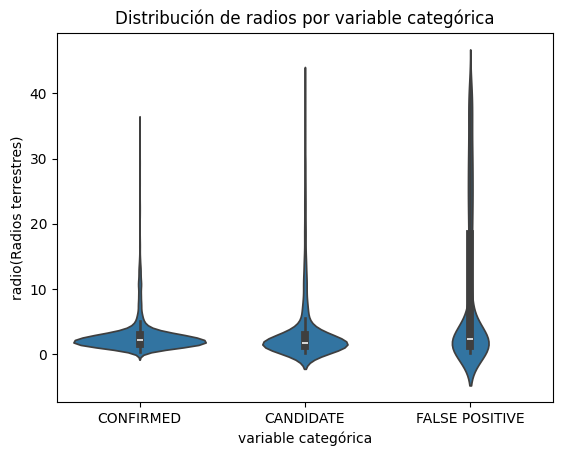

In [7]:
ax1=sns.violinplot(data=df_filtered, x="koi_disposition", y="koi_prad")
ax1.set_title("Distribución de radios por variable categórica")
ax1.set(ylabel="radio(Radios terrestres)", xlabel="variable categórica")

In [8]:
Confirmados=df_filtered[df_filtered["koi_disposition"]=="CONFIRMED"]
Falso=df_filtered[df_filtered["koi_disposition"]=="FALSE POSITIVE"]
Candidato=df_filtered[df_filtered["koi_disposition"]=="CANDIDATE"]

radio_confirmados=Confirmados["koi_prad"]
radio_falso=Falso["koi_prad"]
radio_candidato=Candidato["koi_prad"]
print(f"la media truncada para la categoría de confirmado es {trim_mean(radio_confirmados,0.2)}")
print(f"la media truncada para la categoría de falso es {trim_mean(radio_falso,0.2)}")
print(f"la media truncada para la categoría de candidato es {trim_mean(radio_candidato,0.2)}")

la media truncada para la categoría de confirmado es 2.1740206812652065
la media truncada para la categoría de falso es 5.468044226044227
la media truncada para la categoría de candidato es 1.852568058076225


In [9]:
print(f"la desviación estándar para la categoría de confirmado es {radio_confirmados.std()}")
print(f"la desviación estándar para la categoría de candidato es {radio_candidato.std()}")

la desviación estándar para la categoría de confirmado es 2.7834686717682624
la desviación estándar para la categoría de candidato es 5.619448407514048


### Prueba de Levene.
Hipótesis nula: Todas las muestras de la clases CONFIRMADO y CANDIDATO provienen de poblaciones con la misma varianza.

In [10]:
levene_stat,p_value=levene(radio_confirmados, radio_candidato, center="trimmed", proportiontocut=0.2)
print(f"el estadístico de levene es {levene_stat} y el p-value es {p_value}")

el estadístico de levene es 45.81004233361914 y el p-value es 1.5871134089404845e-11


Hipótesis nula: Las medias recortadas de las clases CONFIRMADO y CANDIDATO son las mismas, pero con diferentes variaciones

In [11]:
T_stats_1, p_value_1=ttest_ind(radio_confirmados, radio_candidato, equal_var=False, trim=0.2)
print(f"el estadístico de t es {T_stats_1} y el p-value es {p_value_1}")

el estadístico de t es 7.645593459521638 y el p-value es 3.3239949525171054e-14


Hipótesis nula: La media recortada de los radios de la clase CONFIRMADO es mayor que la de la clase CANDIDATO

In [12]:
t_stats_2, p_value_2=ttest_ind(radio_confirmados, radio_candidato, equal_var=False, trim=0.2, alternative="less")
print(f"el estadístico de t es {t_stats_2} y el p-value es {p_value_2}")

el estadístico de t es 7.645593459521638 y el p-value es 0.9999999999999833
